In [1]:
import pandas as pd

In [2]:
from pandas import DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import pylab

In [8]:
import statsmodels.api as sm

In [9]:
from scipy import stats

In [10]:
import statistics

In [11]:
from scipy.stats import chisquare

In [12]:
from scipy.stats import chi2_contingency

In [13]:
med_df = pd.read_csv('medical_clean.csv')

In [14]:
#Describing the data set.
#Identifying unique statistics of the data frame
med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [15]:
#Identify the observed values, ReAdmis & Initial_admin
contingency = pd.crosstab(med_df['ReAdmis'], med_df['Initial_admin'])
contingency

Initial_admin,Elective Admission,Emergency Admission,Observation Admission
ReAdmis,,,
No,1608,3156,1567
Yes,896,1904,869


In [16]:
#Defining the table
data = [[1608, 3156, 1567], [896, 1904, 869]]
stat, p, dof, expected = chi2_contingency(data)

In [17]:
#Interpret the p-value
alpha = 0.05
print("p-value=" + str(p))
if p<= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

p-value=0.14298951184306222
Independent (fail to reject H0)


In [18]:
#So, since the p-value is equivalent to 0.14298951184306222..., it is greater than the alpha, which is 0.05
#This means, the variables are independent of each other
#Thus, we fail to reject the null hypothesis

UNIVARIATE STATISTICS

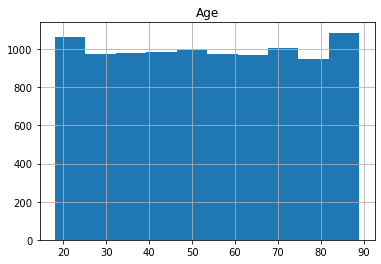

In [19]:
#Histogram
med_df[['Age']].hist()
plt.show()

In [20]:
#Age appears to have a uniform distribution.

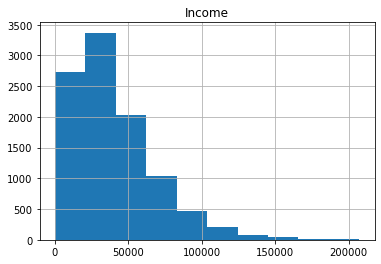

In [21]:
#"Income"
med_df[['Income']].hist()
plt.show()

In [22]:
#Income appears to be positively skewed

<AxesSubplot:xlabel='Complication_risk'>

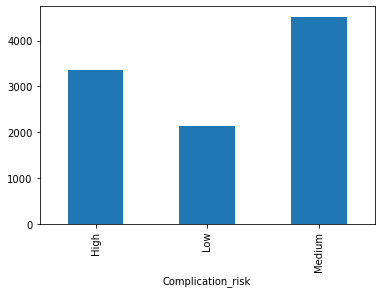

In [23]:
#Bar plot
Complication_risk = med_df.groupby(by='Complication_risk').size()
Complication_risk.plot.bar()

In [63]:
#It looks like regarding the complication risk there are more patients who are considered to be in the Medium risk category

<AxesSubplot:xlabel='ReAdmis'>

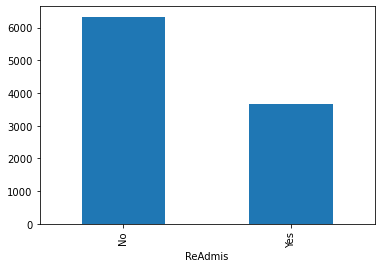

In [56]:
#The second categorical variable will be "ReAdmis"
ReAdmis = med_df.groupby(by='ReAdmis').size()
ReAdmis.plot.bar()

In [57]:
#So here, it looks like there are more patients that are not readmitted than those who are.

BIVARIATE STATISTICS

In [28]:
#Correlation matrix
med_df_cont = med_df[['Age', 'Income']]

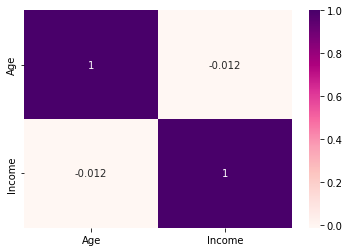

In [53]:
sns.heatmap(med_df_cont.corr(),cmap='RdPu', annot=True)
plt.show()

Text(0, 0.5, 'Complication_risk')

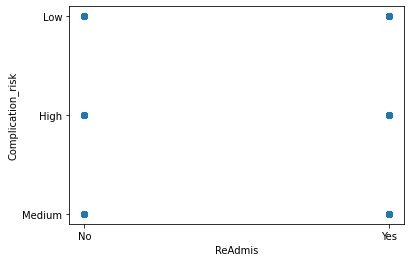

In [59]:
#Scatterplot
plt.scatter(med_df.ReAdmis, med_df.Complication_risk)
plt.xlabel('ReAdmis')
plt.ylabel('Complication_risk')